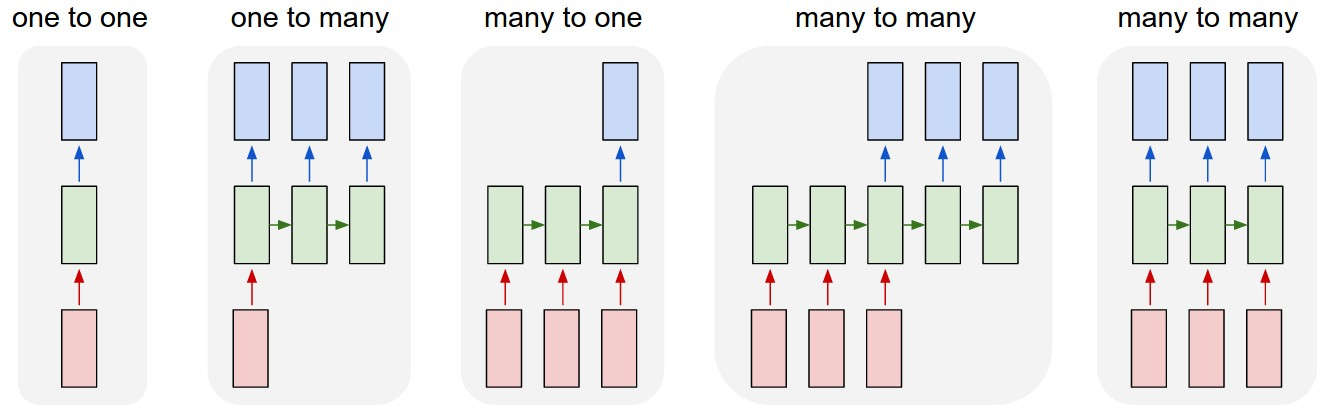





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Network(object):

    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.hidden_dim = sizes[1]
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]
        self.h_weight = np.random.randn(self.hidden_dim,self.hidden_dim)
    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
            # print(a)
        return a
    def feedforward_2(self, a, prev_h):
        ht = tanh(self.weights[0] @ a + self.h_weight @ prev_h + self.biases[0])
        yt = self.weights[1] @ ht + self.biases[1]
        return ht, yt

def sigmoid(z):
      return 1.0/(1.0+np.exp(-z))
def tanh(z):
  return (np.exp(z)-np.exp(-1*z))/(np.exp(z)+np.exp(-1*z))

h0 = np.zeros((2,1))
np.random.seed(1000)
RNN_CELL_1 = Network(sizes=[4,2,2])
x_t1 = np.array([1,2,3,4]).reshape(-1,1)
output_t1, hidden_t1 = RNN_CELL_1.feedforward_2(x_t1,h0)

In [ ]:
RNN_CELL_2 = RNN_CELL_1
x_t2 = np.array([2,2,3,4]).reshape(-1,1)
output_t2, hidden_t2 = RNN_CELL_2.feedforward_2(x_t2,hidden_t1)


In [ ]:
output_t2, hidden_t2

(array([[-0.99999994],
        [ 1.        ]]),
 array([[ 3.91860333],
        [-0.10354592]]))

In [ ]:
RNN_CELL_3 = RNN_CELL_1
x_t3 = np.array([2,2,3,2]).reshape(-1,1)
output_t3, hidden_t3 = RNN_CELL_3.feedforward_2(x_t3,hidden_t2)


In [ ]:
output_t3, hidden_t3

(array([[-0.99735796],
        [-0.99496022]]),
 array([[2.06033222],
        [1.0450898 ]]))

In [ ]:
import torch
import torch.nn as nn

rnncell = nn.RNNCell(4, 128)
outlinear = nn.Linear(128, 2)
x = torch.randn(1,4)
rnnout = rnncell(x)
outlinear(rnnout).shape # expect what?

rnn = nn.RNNCell(10, 20)
input = torch.randn(6, 3, 10)
hx = torch.randn(3, 20)
output = []

for i in range(6):
    hx = rnn(input[i], hx)
    output.append(hx)



In [ ]:
output[0].shape

torch.Size([3, 20])

In [ ]:
rnn = nn.RNNCell(10, 20)
input = torch.randn(10)
hx = torch.randn(20)
outlinear = nn.Linear(20,1)
outlinear(rnn(input,hx))

tensor([0.3965], grad_fn=<ViewBackward0>)

In [ ]:
class RNN(nn.Module):


In [ ]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import urllib.request
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

# n_hidden = 128
# rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
config = {}
config['input_size'] = 4
config['hidden_size'] = 128
config["num_layers"] = 4
config["batch_first"] = True
config["dropout"] = 0.2
config["nonlinearity"] = 'relu'
rnn = nn.RNN(**config)

outlinear = nn.Linear(128, 2)
x = torch.randn(1,4)
output, hidden = rnn(x)
output.shape, hidden.shape
output == hidden[-1,:]



In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

def findFiles(path):
    return glob.glob(path)

# data 폴더 내 모든 이름 데이터 리렉토리 불러오기
# print(findFiles('data/names/*.txt'))


# .,;' 와 대문자소문자알파벳을 포함한 모든 letter 문자열 생성
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
all_letters ,len(all_letters)


("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'", 57)

In [ ]:
# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []

# 파일을 읽고 줄 단위로 분리
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

# 1. txt 파일 명을 카테고리 리스트에 추가
# 2. 카테고리 별의 이름를 category_lines에 추가
for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

Slusarski


In [ ]:
category_lines["Japanese"][:5], category_lines["Italian"][:5], category_lines["Chinese"][:5]

(['Abe', 'Abukara', 'Adachi', 'Aida', 'Aihara'],
 ['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni'],
 ['Ang', 'AuYong', 'Bai', 'Ban', 'Bao'])

In [ ]:
import torch

# all_letters 로 문자의 주소 찾기, 예시 "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# 검증을 위해서 한 개의 문자를 <1 x n_letters> Tensor로 변환
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# 한 줄(이름)을  <line_length x 1 x n_letters>,
# 또는 One-Hot 문자 벡터의 Array로 변경
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters) # len(line) = 문자열길이, 1 = BATCH_SIZE, n_letters = 57 (알파벳 소문자 + 대문자 + " .,;'")
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('kim')), print(lineToTensor('kim').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.

(None, None)

![RNN 모델](https://i.imgur.com/Z2xbySO.png)

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)
h0 = rnn.initHidden()

output, h1 = rnn(lineToTensor('kim')[0], h0) # input letter: k
output, h2 = rnn(lineToTensor('kim')[1], h1) # input letter: i
output, h3 = rnn(lineToTensor('kim')[2], h2) # input letter: m
output.shape

torch.Size([1, 18])

In [ ]:
for i, p in enumerate(rnn.parameters()):
    print(p.shape) # 128 x (57 + 128)


torch.Size([128, 185])
torch.Size([128])
torch.Size([18, 185])
torch.Size([18])


In [ ]:
top_n, top_i = output.topk(1) # 앞서 만든 RNN 의 결과값 (1 X 18) 텐서에서의 최대값 저장 및 최대값 주소 저장
top_n, top_i

(tensor([[-2.7662]], grad_fn=<TopkBackward0>), tensor([[10]]))

In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)  # 텐서의 가장 큰 값 및 주소
    category_i = top_i[0].item()   # 텐서에서 정수 값으로 변경
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Irish', 10)


In [ ]:
h0 = rnn.initHidden()

output, h1 = rnn(lineToTensor('ZXC')[0], h0) # input letter: Z
output, h2 = rnn(lineToTensor('ZXC')[1], h1) # input letter: X
output, h3 = rnn(lineToTensor('ZXC')[2], h2) # input letter: C
print(categoryFromOutput(output))

('Vietnamese', 2)


In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

In [ ]:
category_tensor, line_tensor

* 입력과 목표 Tensor 생성

* 0 로 초기화 된 은닉 상태 생성

* 각 문자 읽기

* 다음 문자를 위한 은닉 상태 유지

* 목표와 최종 출력 비교

* 역전파

* 출력과 손실 반환





In [ ]:
criterion = nn.NLLLoss()
learning_rate = 0.005

def train(category_tensor, line_tensor): # category_tensor = target, line_tensor = input
    hidden = rnn.initHidden()

    rnn.zero_grad() # 꼭 해줘야함

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

# def train_epoch():
#     category, line, category_tensor, line_tensor = randomTrainingExample()
#     output, loss = train(category_tensor, line_tensor)
#     return loss

# def train_full(n_iters=100):
#     current_loss = 0
#     for i in range(n_iters):
#         current_loss += train_epoch()
#     return current_loss / n_iters

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # ``iter`` 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 8s) 2.3413 Noguerra / Japanese ✗ (Spanish)
10000 10% (0m 15s) 3.2489 Roosa / Spanish ✗ (Dutch)
15000 15% (0m 23s) 2.3017 Avhadiev / French ✗ (Russian)
20000 20% (0m 32s) 1.8958 Tyrrell / English ✓
25000 25% (0m 40s) 1.7900 Murray / Scottish ✓
30000 30% (0m 47s) 1.8944 Haik / Korean ✗ (Arabic)
35000 35% (0m 55s) 1.0044 Naser / Arabic ✓
40000 40% (1m 3s) 4.2068 Langlois / Greek ✗ (French)
45000 45% (1m 10s) 2.7890 Denend / French ✗ (Dutch)
50000 50% (1m 19s) 0.3170 Szwarc / Polish ✓
55000 55% (1m 26s) 0.1922 Adelhanov / Russian ✓
60000 60% (1m 49s) 3.0707 Ramos / Greek ✗ (Spanish)
65000 65% (2m 3s) 2.2617 Perkin / Russian ✗ (English)
70000 70% (2m 17s) 1.6764 Martin / Arabic ✗ (Scottish)
75000 75% (2m 26s) 1.8206 Jelinek / Polish ✗ (Czech)
80000 80% (2m 34s) 0.3227 Nicastro / Italian ✓
85000 85% (2m 42s) 0.1877 Asghar / Arabic ✓
90000 90% (2m 51s) 0.2882 Acciaioli / Italian ✓
95000 95% (2m 59s) 2.2651 Simon / English ✗ (Dutch)
100000 100% (3m 8s) 0.3154 Kimura / Japanese ✓


In [ ]:
# 평가시에는 모델의 파라미터값을 변경하지 않음
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

eval_output = evaluate(lineToTensor('Zjfjfjfjosaidjfojkasdf;'))
eval_output2 = evaluate(lineToTensor('OwO'))
eval_output3 = evaluate(lineToTensor('K Im'))
eval_output4 = evaluate(lineToTensor('Hyung ju'))
print(categoryFromOutput(eval_output))
print(categoryFromOutput(eval_output2))
print(categoryFromOutput(eval_output3))
print(categoryFromOutput(eval_output4))

('Scottish', 5)
('Korean', 14)
('Korean', 14)
('Japanese', 6)


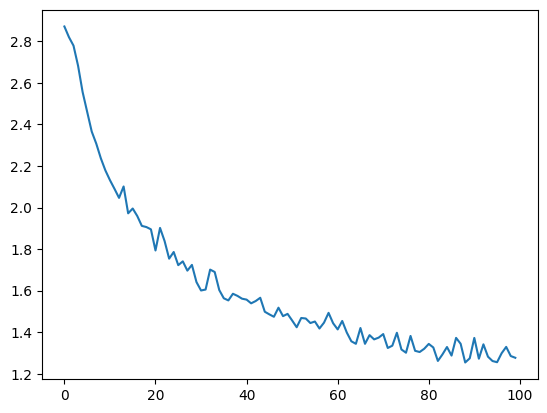

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

<ipython-input-69-e73335c434d1>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-69-e73335c434d1>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


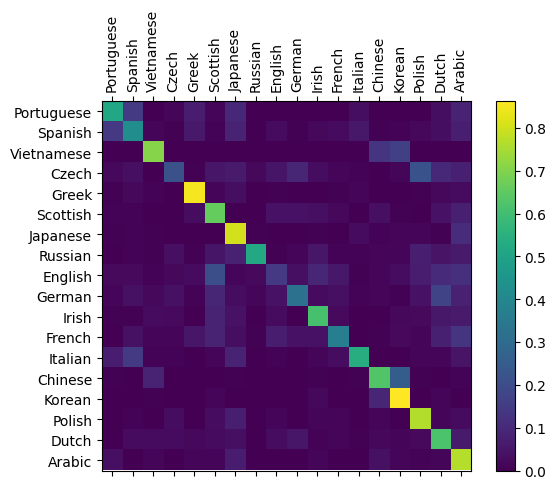

In [ ]:
# 정확한 추측을 추적
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환


# 예시 중 어떤 것이 정확히 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))
        output = F.softmax(output, dim=1)
        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')
predict("Spongebob")
predict("Hyung Ju")


> Dovesky
(0.59) Russian
(0.23) Czech
(0.09) Polish

> Jackson
(0.67) Scottish
(0.16) English
(0.07) Polish

> Satoshi
(0.72) Japanese
(0.21) Arabic
(0.02) Italian

> Spongebob
(0.35) Polish
(0.18) Spanish
(0.17) Scottish

> Hyung Ju
(0.40) Japanese
(0.20) Dutch
(0.08) English
